In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
usuarios = pd.read_csv('curtidas_cervejarias_e_sorveterias.csv', encoding = 'utf8')

In [39]:
usuarios.tail()

,id,firstName,gender,avenue_id,avenue_name,avenue_categories,avenue_lat,avenue_lng
18549,656675,Yoni,male,5b849e523abcaf002c366306,Van Leeuwen Artisan Ice Cream,Ice Cream Shop,40.726191,-73.99885
18550,2071057,Katie,female,5b849e523abcaf002c366306,Van Leeuwen Artisan Ice Cream,Ice Cream Shop,40.726191,-73.99885
18551,445084965,Conor,male,5b849e523abcaf002c366306,Van Leeuwen Artisan Ice Cream,Ice Cream Shop,40.726191,-73.99885
18552,26479,sarkis,male,5b849e523abcaf002c366306,Van Leeuwen Artisan Ice Cream,Ice Cream Shop,40.726191,-73.99885
18553,8675249,Adrian,male,5b849e523abcaf002c366306,Van Leeuwen Artisan Ice Cream,Ice Cream Shop,40.726191,-73.99885


In [40]:
vc = usuarios['avenue_id'].value_counts()

In [55]:
vc

537cd1bb498e956dc853b6a4    1268
50ba7adbe4b036209ec2a3bd    1257
3fd66200f964a52033eb1ee3    1087
3fd66200f964a52008f11ee3    1035
4dd2d0207d8ba0f1bdec829d    1029
4ff74eeae4b0f08304f382fc     848
518a87b3454aef48b51a84ce     838
4abd01bbf964a5200a8820e3     766
49bf289bf964a5200a551fe3     719
40870b00f964a520b7f21ee3     716
4e4e8ef61fc7e04d29e227f3     714
4e4e70306365e1419d0205e4     694
4f5bcf37e4b09a78bfc29e19     660
4f407084e4b020398c9e53b8     578
5255bd577e483efaefb4809d     539
4dc57b9352b1e8f9f7d51323     526
4d1e8f8e5acaa35dfb7eb835     460
4cb34b64aef16dcb6287c754     374
4b894ff4f964a520ad2a32e3     370
5351c847498ed4c1fd202a69     342
55de5e2b498eb54e65d9daff     319
5334ca98498e9b39d9495aee     315
516456f1e4b02852cb39b8af     311
55877ae9498ee57015ef8d23     294
43504680f964a520b2281fe3     248
526b2d8e498ebc6b00a1c587     175
4ee40e906d868c055061c7b5     172
5557b7a5498e14df4df7be8b     147
4ebedd607beb5340001f897f     139
519c184a5019b7029eb921ab     124
          

#### Filtra locais com mais de 9 likes na base de dados

In [62]:
filter = vc[vc >= 1000].index.tolist()

In [65]:
unique_users = usuarios[usuarios['avenue_id'].isin(filter)]['id'].drop_duplicates()

In [66]:
len(unique_users)

4949

In [75]:
type(unique_users)

pandas.core.series.Series

In [67]:
base_u = usuarios[usuarios['avenue_id'].isin(filter)]

In [68]:
vc_l = base_u['avenue_name'].value_counts()

In [69]:
vc_l

Morgenstern's Finest Ice Cream                                                               1268
Big Gay Ice Cream Shop                                                                       1257
The Original Chinatown Ice Cream Factory 華埠雪糕行 (The Original Chinatown Ice Cream Factory)    1087
Bohemian Hall & Beer Garden                                                                  1035
Van Leeuwen Artisan Ice Cream                                                                1029
Name: avenue_name, dtype: int64

In [70]:
unique_avenues = list(vc_l.index)

In [71]:
unique_avenues

["Morgenstern's Finest Ice Cream",
 'Big Gay Ice Cream Shop',
 'The Original Chinatown Ice Cream Factory 華埠雪糕行 (The Original Chinatown Ice Cream Factory)',
 'Bohemian Hall & Beer Garden',
 'Van Leeuwen Artisan Ice Cream']

In [81]:
[i for i in unique_users]

[123557238,
 91747140,
 42407406,
 434898795,
 79371005,
 91710889,
 373756773,
 1101212,
 3698436,
 834528,
 9449380,
 56589532,
 515452,
 497424,
 340516220,
 498004905,
 1876363,
 449711939,
 251525,
 33938898,
 7874505,
 7963881,
 2119476,
 66893344,
 92070149,
 481227520,
 1943113,
 151103484,
 236674,
 88389605,
 391894547,
 128134923,
 13487395,
 488709470,
 138584469,
 14512578,
 6954997,
 486582364,
 405843453,
 3559845,
 45304564,
 615769,
 15615601,
 59316610,
 70621931,
 436567354,
 26802194,
 95059351,
 3576840,
 123171966,
 4521265,
 240571,
 3110831,
 27554,
 404268604,
 184332796,
 24902,
 40927430,
 13180197,
 446791992,
 64807303,
 6784654,
 327540029,
 8862314,
 46297268,
 273146,
 15016670,
 1244273,
 146280333,
 382915159,
 410798579,
 6339488,
 12940745,
 146479,
 175743,
 1302134,
 2647275,
 1422081,
 2042932,
 420938808,
 67790574,
 3170348,
 2840656,
 188487,
 4583594,
 165398602,
 9935175,
 1261064,
 160169849,
 3475293,
 3852617,
 17742155,
 407306984,
 13923

In [72]:
G = nx.Graph()

In [83]:
for u in base_u.iterrows():
    G.add_node(u[1]['id'], nome=u[1]['firstName'], tipo='pessoa')

In [84]:
for l in unique_avenues:
    G.add_node(l, nome=l, tipo='local')

In [26]:
for u in unique_users.iterrows():
    id = u[1]['id']
    local_id = base[base['id'] == id]
    for local in local_id.iterrows():
        local_id = local[1]['avenue_id']
        for p in base[base['avenue_id'] == local_id].iterrows():
            if p[1]['id'] != id:
                if G.has_edge(id, p[1]['id']):
                    for id1,id2,data in G.edges(data=True):
                        if (id == id1 or id == id2) and (p[1]['id'] == id1 or p[1]['id'] == id2):
                            data['weight'] = data['weight'] + 1
                            break
                else:
                    G.add_edge(id, p[1]['id'], weight=1)

In [16]:
for u in unique_users.iterrows():
    id = u[1]['id']
    local_id = base_u[base_u['id'] == id]
    for local in local_id.iterrows():
        local_id = local[1]['avenue_id']
        for p in base_u[base_u['avenue_id'] == local_id].iterrows():
            if p[1]['id'] != id:
                G.add_edge(id, p[1]['id'], weight=1, local=local[1]['avenue_name'])                

In [85]:
for l in unique_avenues:
    for p in base_u[base_u['avenue_name'] == l].iterrows():
        G.add_edge(l, p[1]['id'], weight=1)

In [86]:
nx.write_gml(G, 'graph_cervejarias_e_sorveterias.gml')

In [64]:
nx.average_clustering(G, weight='weight')

0.15404212669797224

In [65]:
nx.average_clustering(G)

0.7624683704772562

In [30]:
pos = nx.spring_layout(G)
betCent = nx.eigenvector_centrality_numpy(G, weight='weight')
node_color = [G.degree(v, weight='weight') for v in G]
node_size = [v * 10000 for v in betCent.values()]

C:\Users\victorm\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(-0.7961282383299401,
 1.096547208415431,
 -0.7232710759168695,
 0.805454201703233)

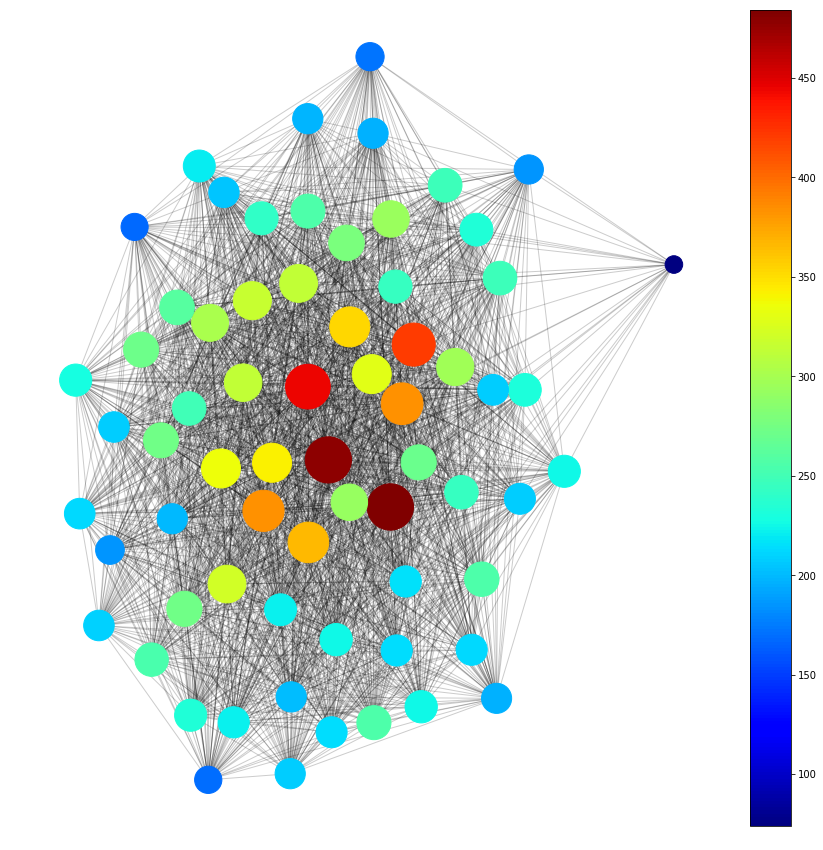

In [31]:
plt.figure(figsize=(15,15))
nodes = G.nodes()
ed = nx.draw_networkx_edges(G, pos=pos, alpha=0.2)
no = nx.draw_networkx_nodes(G, pos=pos, with_labels=False, node_color=node_color, 
                         nodelist=nodes,
                         node_size=node_size, cmap=plt.cm.jet)
plt.colorbar(no)
plt.axis('off')